In [3]:
#Importing numpy, pandas, matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
#importing csv file using pd.read_csv
cities = pd.read_csv('~/Downloads/UK_cities.txt', sep='\s+')

In [13]:
#using the describe() function to describe the imported file
cities.describe()


,Year granted,Population
count,69.000000,6.900000e+01
mean,1635.420290,2.060080e+05
std,414.280006,1.931626e+05
min,927.000000,1.841000e+03
25%,1133.000000,8.885900e+04
50%,1888.000000,1.511450e+05
75%,1951.000000,2.733690e+05
max,2012.000000,1.092330e+06


In [148]:
#calculating the median using the median() function
np.median(cities['Population'])

151145.0

In [22]:
#using perason method to determine the pearson's correlation 
pearson = cities.corr(method="pearson")
pearson

,Year granted,Population
Year granted,1.000000,0.319573
Population,0.319573,1.000000


In [25]:
#using kendall method to determine the kendall's correlation 
kendall = cities.corr(method="kendall")
kendall

,Year granted,Population
Year granted,1.000000,0.115062
Population,0.115062,1.000000


In [29]:
#  Create a new column containing the population in thousands.
cities['Population1000'] = cities['Population']/1000
cities

,City,Alternative name,Year granted,Cathedral (pre-1888),City council,Nation/Region,Population,Population1000
0,Aberdeen,Aiberdeen,1891,High Kirk of Aberdeen (St Machar's),Local government district,Scotland,189120,189.120
1,Armagh,Ard Mhacha,1994,*not applicable*,Local government district,Northern Ireland,59340,59.340
2,Bangor,Bangor,927,Church of St Deiniol,Community,Wales,16358,16.358
3,Bath,Aquae Sulis,1090,Abbey Church of SS Peter & Paul,Charter trustees,England,88859,88.859
4,Belfast,Beal Feirste,1888,*not applicable*,Local government district,Northern Ireland,333871,333.871
...,...,...,...,...,...,...,...,...
64,Wells,Wells,927,Church of St Andrew,Civil parish,England,10536,10.536
65,Winchester,Venta Belgarum,927,Church of the Holy Trinity,Local government district,England,116595,116.595
66,Wolverhampton,Wolverhampton,2000,*not applicable*,Local government district,England,249470,249.470
67,Worcester,Worcester,927,Church of Christ & St Mary,Local government district,England,98768,98.768


In [47]:
# Use groupby to sum up the populations of the different Nation/Region
cities_group = cities.groupby('Nation/Region')
England = cities_group.get_group('England')
print(np.sum(England['Population']))
Wales = cities_group.get_group('Wales')
print(np.sum(Wales['Population']))
Northern_Ireland = cities_group.get_group('Northern Ireland')
print(np.sum(Northern_Ireland['Population']))
Scotland = cities_group.get_group('Scotland')
print(np.sum(Scotland['Population']))


11270697
752403
651199
1540250


In [52]:
#Create new dataframes with the data for old cities (city status granted before 1888)
and new cities. Sum up the populations of the two groups.
cities_old = cities[cities['Year granted'] < 1888]
cities_new = cities[cities['Year granted']>= 1888]
print(np.sum(cities_old['Population']))
print(np.sum(cities_new['Population']))

5517711
8696838


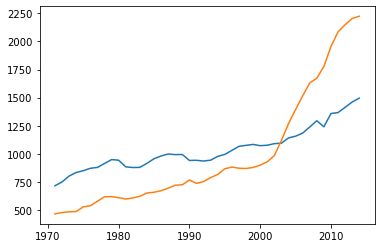

In [147]:
#Read excel file  with pd.read_excel 
df_energy = pd.read_excel('~/Downloads/energy_per_head.xls')
#  Transpose FILE
df_energy = df_energy.transpose()
df_energy
df_energy.columns = df_energy.iloc[0]
df_energy = df_energy[2:]
df_energy.head()

#Remove NaN’s for the Brazil and China entries
df_energy = df_energy.apply (pd.to_numeric, errors='coerce')

Brazil = df_energy['Brazil']
China = df_energy['China']
Brazil = Brazil.dropna()
China = China.dropna()
#changing the index type from str to init
Brazil.index = Brazil.index.astype(int)
China.index = China.index.astype(int)
# plot as function of year
plt.plot( Brazil)
plt.plot(China)